In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-77.6876127311358 -75.10808889363845
75.49096946815325 67.17435883532323
-47.44289540757614 -175.89318031634218
-20.461660459670043 137.32893434540853
61.996634783284065 164.00913460217328
-18.392649234620805 -26.86068274913862
-38.33863414442118 118.67046553672088
-30.294178984422004 -48.8168739659433
88.29272534574937 149.65805472696496
-10.384729519687966 73.15226635798032
46.113313778773374 179.73133938294728
48.65037982476804 -67.47720267020375
-40.47331954221951 -13.213724427810263
0.5318593617979985 -178.23589166955657
45.35398189735412 -3.9511723747713745
58.372204790055434 64.28539800343614
-38.606506008905974 96.45543348226465
-35.34522309670626 104.32673449313683
32.791766279097686 66.41364089751158
83.2655707866866 162.99086914268833
-72.72026983821787 -11.463670351520534
-27.057044078609962 -4.9725932352151005
40.13590851829815 35.32019437368865
89.76189005658728 -41.98047762466501
-85.29331051706816 167.77838597983913
64.62029164041897 142.20488869221913
-79.8966662874945

-80.4895237804785 8.427765199098218
-26.43398111854829 138.26435391058038
-58.28940859900598 1.3290993757465515
-0.777471425465464 30.549991727384622
-76.04841906674986 -29.474467859395986
29.588839821248 22.84591337841158
69.26463408850788 39.46554922645987
56.72190967599576 -112.94730585243735
81.462446195561 -29.35214356162922
9.034982149104579 73.75817407646204
-60.543647783475485 -165.45807915034817
-28.820200586613133 62.745834348379844
-27.0228705362194 -113.7640427251316
-4.512951945529792 100.21001836954929
-86.62980015161574 31.523608754711603
-65.14648436838642 19.978364533895842
55.60687767425074 124.5896976500411
-32.07867607835784 160.34455146319561
-29.71578651857689 126.70127941048139
47.26874550316015 75.86406307512524
-27.85270911942289 -19.394002999496877
81.44049211520243 131.31129505894722
-18.55482493650389 38.96844278795308
-15.828591114364329 12.109025310015284
-82.89853839287973 97.1449262693452
57.55312744545344 96.88634375732755
-32.29195179223332 -97.3204372

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 6 of Set 1 | belmonte
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | capao da canoa
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | amqui
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | santander
Processing Record 16 of Set 1 | tabory
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | uruzgan
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | sorgun
Pr

Processing Record 39 of Set 4 | agirish
Processing Record 40 of Set 4 | yazykovo
Processing Record 41 of Set 4 | tatawin
Processing Record 42 of Set 4 | avanigadda
Processing Record 43 of Set 4 | sao filipe
Processing Record 44 of Set 4 | sibolga
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | puerto carreno
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | hovd
Processing Record 49 of Set 4 | olinda
Processing Record 50 of Set 4 | viedma
Processing Record 1 of Set 5 | takoradi
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | bokspits
City not found. Skipping...
Processing Record 4 of Set 5 | sakaiminato
Processing Record 5 of Set 5 | sicuani
Processing Record 6 of Set 5 | namatanai
Processing Record 7 of Set 5 | port-cartier
Processing Record 8 of Set 5 | bentiu
Processing Record 9 of Set 5 | somerset east
Processing Record 10 of Set 5 | juneau
Processing Record 11 of Set 5 | vardo
Processing Record 12 of Set

Processing Record 30 of Set 8 | kulhudhuffushi
Processing Record 31 of Set 8 | indianola
Processing Record 32 of Set 8 | valdivia
Processing Record 33 of Set 8 | pontianak
Processing Record 34 of Set 8 | maldonado
Processing Record 35 of Set 8 | pergine valsugana
Processing Record 36 of Set 8 | krasnoarmeysk
Processing Record 37 of Set 8 | esna
Processing Record 38 of Set 8 | zhanaozen
Processing Record 39 of Set 8 | camacha
Processing Record 40 of Set 8 | orocue
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | ostrovnoy
Processing Record 43 of Set 8 | tekkali
Processing Record 44 of Set 8 | sol-iletsk
Processing Record 45 of Set 8 | puerto leguizamo
Processing Record 46 of Set 8 | souillac
Processing Record 47 of Set 8 | tartagal
Processing Record 48 of Set 8 | valleyview
Processing Record 49 of Set 8 | ravar
Processing Record 50 of Set 8 | abu dhabi
Processing Record 1 of Set 9 | rocha
Processing Record 2 of Set 9 | wiarton
Processing Record 3 of Set 9 | ponta del

Processing Record 16 of Set 12 | ballina
Processing Record 17 of Set 12 | bulgan
Processing Record 18 of Set 12 | zatoka
Processing Record 19 of Set 12 | vao
Processing Record 20 of Set 12 | alibag
Processing Record 21 of Set 12 | poyarkovo
Processing Record 22 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 23 of Set 12 | karratha
Processing Record 24 of Set 12 | pathein
Processing Record 25 of Set 12 | jabiru
City not found. Skipping...
Processing Record 26 of Set 12 | ouadda
Processing Record 27 of Set 12 | nishihara
Processing Record 28 of Set 12 | baherden
Processing Record 29 of Set 12 | kurya
Processing Record 30 of Set 12 | santa cruz del norte
Processing Record 31 of Set 12 | fremont
Processing Record 32 of Set 12 | gazanjyk
Processing Record 33 of Set 12 | jibuti
Processing Record 34 of Set 12 | bubaque
Processing Record 35 of Set 12 | hay river
Processing Record 36 of Set 12 | am timan
Processing Record 37 of Set 12 | ilebo
Processing Record 38 of Set 1

In [11]:
len(city_data)

551

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.26,93,40,2.30,AR,2022-08-03 15:50:35
1,Vaini,-21.2000,-175.2000,75.36,94,40,9.22,TO,2022-08-03 15:52:03
2,Mount Isa,-20.7333,139.5000,62.37,67,1,0.00,AU,2022-08-03 15:52:04
3,Belmonte,-15.8631,-38.8828,77.72,59,8,7.81,BR,2022-08-03 15:52:04
4,Albany,42.6001,-73.9662,83.68,53,3,1.99,US,2022-08-03 15:48:45
5,Capao Da Canoa,-29.7456,-50.0097,64.29,89,41,12.77,BR,2022-08-03 15:51:01
6,Chokurdakh,70.6333,147.9167,49.59,62,100,1.95,RU,2022-08-03 15:48:21
7,Hithadhoo,-0.6000,73.0833,81.27,73,37,15.35,MV,2022-08-03 15:51:58
8,Nikolskoye,59.7035,30.7861,75.78,62,52,3.00,RU,2022-08-03 15:52:05
9,Amqui,48.4638,-67.4313,68.47,43,12,6.17,CA,2022-08-03 15:48:09


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-08-03 15:50:35,-54.8000,-68.3000,35.26,93,40,2.30
1,Vaini,TO,2022-08-03 15:52:03,-21.2000,-175.2000,75.36,94,40,9.22
2,Mount Isa,AU,2022-08-03 15:52:04,-20.7333,139.5000,62.37,67,1,0.00
3,Belmonte,BR,2022-08-03 15:52:04,-15.8631,-38.8828,77.72,59,8,7.81
4,Albany,US,2022-08-03 15:48:45,42.6001,-73.9662,83.68,53,3,1.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

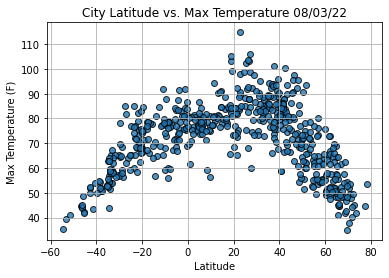

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

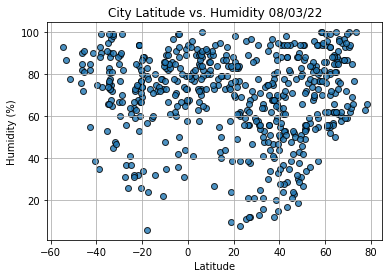

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

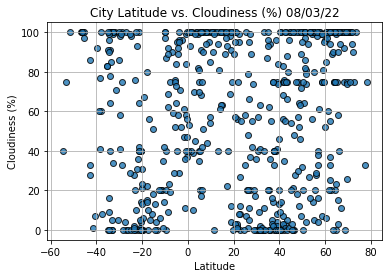

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

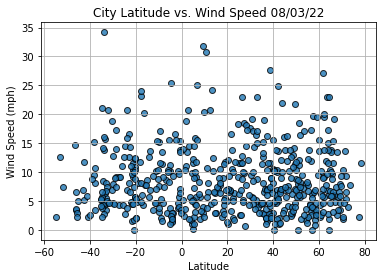

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()